In [1]:
#Importing libraries
#!pip install -U scikit-learn
#!pip3 install xgboost
#!pip install catboost
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import catboost as cb
#import xgboost as xgb

from sklearn import datasets, ensemble, tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#Specify loacations of datasets
ds_address_f_perf_R=r'C:\Users\vitde\Documents\Vitaliy\ANN\Shear\Datasets\CSV\FEA_Flat_Perf_R_Dataset.csv'
ds_address_s_perf_R=r'C:\Users\vitde\Documents\Vitaliy\ANN\Shear\Datasets\CSV\FEA_Stiff_Perf_R_Dataset.csv'
ds_address_f_perf_TS=r'C:\Users\vitde\Documents\Vitaliy\ANN\Shear\Datasets\CSV\FEA_Flat_Perf_TS_Dataset.csv'
ds_address_s_perf_TS=r'C:\Users\vitde\Documents\Vitaliy\ANN\Shear\Datasets\CSV\FEA_Stiff_Perf_TS_Dataset.csv'

#Import datasets
flat_perf_R=pd.read_csv(ds_address_f_perf_R)
stiff_perf_R=pd.read_csv(ds_address_s_perf_R)
flat_perf_TS=pd.read_csv(ds_address_f_perf_TS)
stiff_perf_TS=pd.read_csv(ds_address_s_perf_TS)

#Drop NaN values from the datasets
flat_perf_R.dropna(axis=0, how='all',inplace=True)
flat_perf_R.dropna(axis=1, how='all',inplace=True)
stiff_perf_R.dropna(axis=0, how='all',inplace=True)
stiff_perf_R.dropna(axis=1, how='all',inplace=True)
flat_perf_TS.dropna(axis=0, how='all',inplace=True)
flat_perf_TS.dropna(axis=1, how='all',inplace=True)
stiff_perf_TS.dropna(axis=0, how='all',inplace=True)
stiff_perf_TS.dropna(axis=1, how='all',inplace=True)

In [3]:
print(flat_perf_R.shape)
print(stiff_perf_R.shape)
print(flat_perf_TS.shape)
print(stiff_perf_TS.shape)

(818, 18)
(938, 18)
(818, 18)
(938, 18)


In [4]:
#Divide datasets into input and output parameters
flat_perf_R_y=flat_perf_R.drop(['Model_ID','D','B','B1','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','r','a_h','hst','Vcr'],axis=1)
flat_perf_R_x=flat_perf_R.drop(['Model_ID','r','Vcr','V','B1'],axis=1)

stiff_perf_R_y=stiff_perf_R.drop(['Model_ID','D','B','B1','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','r','a_h','hst','Vcr'],axis=1)
stiff_perf_R_x=stiff_perf_R.drop(['Model_ID','r','Vcr','V','B1'],axis=1)

flat_perf_TS_y=flat_perf_TS.drop(['Model_ID','D','B','B1','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','r','a_h','hst','Vcr'],axis=1)
flat_perf_TS_x=flat_perf_TS.drop(['Model_ID','r','Vcr','V','B1'],axis=1)

stiff_perf_TS_y=stiff_perf_TS.drop(['Model_ID','D','B','B1','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','r','a_h','hst','Vcr'],axis=1)
stiff_perf_TS_x=stiff_perf_TS.drop(['Model_ID','r','Vcr','V','B1'],axis=1)

In [5]:
# Shuffle and split the datasets into train/validation (80%) and test datasets (20%)
from sklearn.model_selection import train_test_split
f_p_R_x_train, f_p_R_x_test, f_p_R_y_train, f_p_R_y_test = train_test_split(flat_perf_R_x, flat_perf_R_y,test_size=0.2,random_state=7)
s_p_R_x_train, s_p_R_x_test, s_p_R_y_train, s_p_R_y_test = train_test_split(stiff_perf_R_x, stiff_perf_R_y,test_size=0.2,random_state=7)
f_p_TS_x_train, f_p_TS_x_test, f_p_TS_y_train, f_p_TS_y_test = train_test_split(flat_perf_TS_x, flat_perf_TS_y,test_size=0.2,random_state=7)
s_p_TS_x_train, s_p_TS_x_test, s_p_TS_y_train, s_p_TS_y_test = train_test_split(stiff_perf_TS_x, stiff_perf_TS_y,test_size=0.2,random_state=7)
print(f_p_R_x_train.shape)
print(f_p_R_x_test.shape)
print(s_p_R_x_train.shape)
print(s_p_R_x_test.shape)

(654, 13)
(164, 13)
(750, 13)
(188, 13)


Combine datasets

In [6]:
# Train/validation set
X = pd.concat([f_p_R_x_train,s_p_R_x_train,f_p_TS_x_train,s_p_TS_x_train]).values
Y = pd.concat([f_p_R_y_train,s_p_R_y_train,f_p_TS_y_train,s_p_TS_y_train]).values.ravel()

# Test set
X_T=pd.concat([f_p_R_x_test,s_p_R_x_test,f_p_TS_x_test,s_p_TS_x_test]).values
Y_T = pd.concat([f_p_R_y_test,s_p_R_y_test,f_p_TS_y_test,s_p_TS_y_test]).values.ravel()

print(X.shape)
print(Y.shape)

print(X_T.shape)
print(Y_T.shape)


(2808, 13)
(2808,)
(704, 13)
(704,)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_T=sc.transform (X_T)

In [8]:
#Defining Mean Square Error  
def mse(y_true, y_pred):
	return ((y_pred - y_true)**2).mean()

#Defining Root Mean Square Error 
def rmse(y_true, y_pred):
	return np.sqrt(((y_pred - y_true) ** 2).mean())

#Defining Mean Absolute Error 
def mae(y_true, y_pred):
	return np.abs(y_pred - y_true).mean()

#Defining Mean Absolute Persentage Error 
def mape(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Defining Coefficient of Determination R2
def R2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [9]:
#Create Model
params = {'base_estimator': ensemble.RandomForestRegressor(),
          'n_estimators': 400,
          'learning_rate': 0.2,
          'loss': 'linear',
          'random_state': 7}

reg = ensemble.AdaBoostRegressor(**params)
reg.fit(X,Y)
    

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=0.2,
                  n_estimators=400, random_state=7)

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [11]:
#Fold Dataset and Train Model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X, Y, cv=10, scoring='neg_mean_squared_error') #cv is cross validation
print(scores)
print(scores.mean())

[-4022670.20315145 -4760343.75980069 -3429851.9916907  -2603256.75192075
 -2671594.37032207 -2875985.94424761 -3662410.91999821 -4011199.33567567
 -3984021.49540193 -6077930.38045616]
-3809926.5152665237


MSE train: 839689.8523661632
RMSE train: 916.3459239643963
MAE train: 764.6923411288078
MAPE train: 6.310113228302974
R2 train: 0.9952648939369458
AdaBoost_TEST_min_train: 0.8080727876445478
AdaBoost_TEST_max_train: 2.5297662928113995
AdaBoost_TEST_mean_train: 1.0418808333172225
AdaBoost_TEST_COV_train: 0.09829503097589543


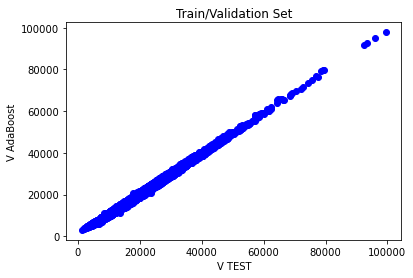

MSE test: 5102552.70241281
RMSE test: 2258.883065236625
MAE test: 1465.2445829784406
MAPE test: 8.940951336214718
R2 test: 0.9755407987422927
AdaBoost_TEST_min_test: 0.7767878516547481
AdaBoost_TEST_max_test: 2.0643202168378356
AdaBoost_TEST_mean_test: 1.0537673572231308
AdaBoost_TEST_COV_test: 0.12334997335576782


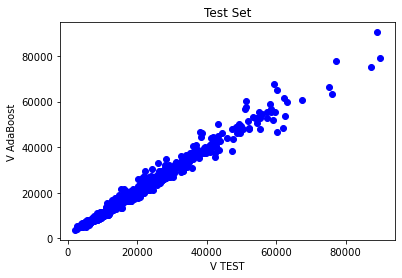

MSE all: 1694204.5011226663
RMSE all: 1301.616111271932
MAE all: 905.1219476954767
MAPE all: 6.8374794093877895
R2 all: 0.9907795353109143
AdaBoost_TEST_min_all: 0.7767878516547481
AdaBoost_TEST_max_all: 2.5297662928113995
AdaBoost_TEST_mean_all: 1.0442635533712543
AdaBoost_TEST_COV_all: 0.10400204124633583


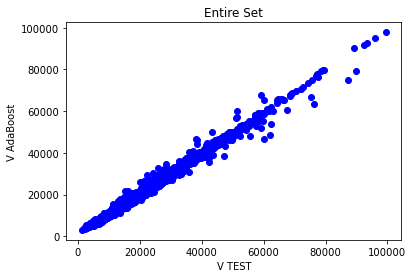

In [12]:
    Y_predict = reg.predict(X)
    
    MSE_train=mse(Y,Y_predict)
    MAE_train=mae(Y,Y_predict)
    MAPE_train=mape(Y,Y_predict)
    R2_train=r2_score(Y,Y_predict)

    print('MSE train: '+str(mse(Y,Y_predict)))
    print('RMSE train: '+str(rmse(Y,Y_predict)))
    print('MAE train: '+str(mae(Y,Y_predict)))
    print('MAPE train: '+str(mape(Y,Y_predict)))
    print('R2 train: '+str(r2_score(Y,Y_predict)))

    AdaBoost_TEST_min=np.ndarray.min(Y_predict/Y)
    AdaBoost_TEST_max=np.ndarray.max(Y_predict/Y)
    AdaBoost_TEST_mean=np.ndarray.mean(Y_predict/Y)
    AdaBoost_TEST_std=np.ndarray.std(Y_predict/Y)
    AdaBoost_TEST_COV=AdaBoost_TEST_std/AdaBoost_TEST_mean

    print('AdaBoost_TEST_min_train: '+str(AdaBoost_TEST_min))
    print('AdaBoost_TEST_max_train: '+str(AdaBoost_TEST_max))
    print('AdaBoost_TEST_mean_train: '+str(AdaBoost_TEST_mean))
    print('AdaBoost_TEST_COV_train: '+str(AdaBoost_TEST_COV))
    
    plt.plot(Y,Y_predict,'bo')
    plt.title('Train/Validation Set')
    plt.xlabel('V TEST')
    plt.ylabel('V AdaBoost')
    #plt.axis([0, 120000, 0, 120000])
    plt.savefig('V_MSE_Train.png',dpi=600)
    plt.show()
    
    
    Y_T_predict = reg.predict(X_T)
    MSE_test=mse(Y_T,Y_T_predict)
    MAE_test=mae(Y_T,Y_T_predict)
    MAPE_test=mape(Y_T,Y_T_predict)
    R2_test=r2_score(Y_T,Y_T_predict)

    print('MSE test: '+str(mse(Y_T,Y_T_predict)))
    print('RMSE test: '+str(rmse(Y_T,Y_T_predict)))
    print('MAE test: '+str(mae(Y_T,Y_T_predict)))
    print('MAPE test: '+str(mape(Y_T,Y_T_predict)))
    print('R2 test: '+str(r2_score(Y_T,Y_T_predict)))

    AdaBoost_TEST_T_min=np.ndarray.min(Y_T_predict/Y_T)
    AdaBoost_TEST_T_max=np.ndarray.max(Y_T_predict/Y_T)
    AdaBoost_TEST_T_mean=np.ndarray.mean(Y_T_predict/Y_T)
    AdaBoost_TEST_T_std=np.ndarray.std(Y_T_predict/Y_T)
    AdaBoost_TEST_T_COV=AdaBoost_TEST_T_std/AdaBoost_TEST_T_mean

    print('AdaBoost_TEST_min_test: '+str(AdaBoost_TEST_T_min))
    print('AdaBoost_TEST_max_test: '+str(AdaBoost_TEST_T_max))
    print('AdaBoost_TEST_mean_test: '+str(AdaBoost_TEST_T_mean))
    print('AdaBoost_TEST_COV_test: '+str(AdaBoost_TEST_T_COV))

    plt.plot(Y_T,Y_T_predict,'bo')
    plt.title('Test Set')
    plt.xlabel('V TEST')
    plt.ylabel('V AdaBoost')
    #plt.axis([0, 120000, 0, 120000])
    plt.savefig('V_MSE_Test.png',dpi=600)
    plt.show()
    
    X_ALL= np.concatenate((X,X_T))
    Y_ALL= np.concatenate((Y,Y_T))
    Y_ALL_predict=reg.predict(X_ALL)
    
    MSE_ALL=mse(Y_ALL,Y_ALL_predict)
    MAE_ALL=mae(Y_ALL,Y_ALL_predict)
    MAPE_ALL=mape(Y_ALL,Y_ALL_predict)
    R2_ALL=r2_score(Y_ALL,Y_ALL_predict)

    print('MSE all: '+str(mse(Y_ALL,Y_ALL_predict)))
    print('RMSE all: '+str(rmse(Y_ALL,Y_ALL_predict)))
    print('MAE all: '+str(mae(Y_ALL,Y_ALL_predict)))
    print('MAPE all: '+str(mape(Y_ALL,Y_ALL_predict)))
    print('R2 all: '+str(r2_score(Y_ALL,Y_ALL_predict)))

    AdaBoost_TEST_ALL_min=np.ndarray.min(Y_ALL_predict/Y_ALL)
    AdaBoost_TEST_ALL_max=np.ndarray.max(Y_ALL_predict/Y_ALL)
    AdaBoost_TEST_ALL_mean=np.ndarray.mean(Y_ALL_predict/Y_ALL)
    AdaBoost_TEST_ALL_std=np.ndarray.std(Y_ALL_predict/Y_ALL)
    AdaBoost_TEST_ALL_COV=AdaBoost_TEST_ALL_std/AdaBoost_TEST_ALL_mean

    print('AdaBoost_TEST_min_all: '+str(AdaBoost_TEST_ALL_min))
    print('AdaBoost_TEST_max_all: '+str(AdaBoost_TEST_ALL_max))
    print('AdaBoost_TEST_mean_all: '+str(AdaBoost_TEST_ALL_mean))
    print('AdaBoost_TEST_COV_all: '+str(AdaBoost_TEST_ALL_COV))

    plt.plot(Y_ALL,Y_ALL_predict,'bo')
    plt.title('Entire Set')
    plt.xlabel('V TEST')
    plt.ylabel('V AdaBoost')
    #plt.axis([0, 120000, 0, 120000])
    plt.savefig('V_MSE_All.png',dpi=600)
    plt.show()

In [34]:
from joblib import dump, load
dump(reg, 'SlCh_Vn_AdaBoost_2021-02-07.joblib')

['SlCh_Vn_AdaBoost_2021-02-07.joblib']

In [35]:
#save scaler
from pickle import dump
dump(sc, open('SlCh_Vn_AdaBoost_2021-02-07.pkl', 'wb'))

In [15]:
#Load trained models and scalers
#import joblib
#import pickle
#model = joblib.load(r'C:\Users\vitaliy.degtyarev/ACI408_GBR_2021-01-09.joblib')
#scaler=pickle.load(open(r'C:\Users\vitaliy.degtyarev/ACI408_GBR_2021-01-09.pkl','rb'))

In [16]:
summary=[[params['n_estimators'], params['learning_rate'],
          MSE_train, MAE_train, MAPE_train,R2_train, AdaBoost_TEST_min, AdaBoost_TEST_max, AdaBoost_TEST_mean, AdaBoost_TEST_COV,
          MSE_test, MAE_test, MAPE_test,R2_test, AdaBoost_TEST_T_min, AdaBoost_TEST_T_max, AdaBoost_TEST_T_mean, AdaBoost_TEST_T_COV,
          MSE_ALL, MAE_ALL, MAPE_ALL,R2_ALL, AdaBoost_TEST_ALL_min, AdaBoost_TEST_ALL_max, AdaBoost_TEST_ALL_mean, AdaBoost_TEST_ALL_COV] ]

np.savetxt("SlCh_Vn_AdaBoost_2021-02-07.csv", summary, delimiter=",")

In [17]:
#training_set_performance=[Y],[Y_predict]
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_train_exp.csv", Y, delimiter=",")
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_train.csv", Y_predict, delimiter=",")

#test_set_performance=[Y_T,Y_T_predict]
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_test_exp.csv", Y_T, delimiter=",")
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_test.csv", Y_T_predict, delimiter=",")

#entire_set_performance=[Y_ALL,Y_ALL_predict]
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_all_exp.csv", Y_ALL, delimiter=",")
np.savetxt("SlCh_Vn_AdaBoost_2021-02-07_all.csv", Y_ALL_predict, delimiter=",")

In [18]:
#Permutation importance
from mlxtend.evaluate import feature_importance_permutation
imp_vals, _ = feature_importance_permutation(
    predict_method=reg.predict, 
    X=X_ALL,
    y=Y_ALL,
    metric='r2',
    num_rounds=100,
    seed=1)

imp_vals

array([0.08997326, 0.02094192, 1.3630438 , 0.1487937 , 0.13200061,
       0.00425521, 0.00439847, 0.04739578, 0.15371248, 0.03650436,
       0.05019626, 0.09531123, 0.05511971])

In [19]:
features=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst']
df = pd.DataFrame({'Features':features,
                  'Importance':imp_vals})
df_sorted= df.sort_values('Importance')

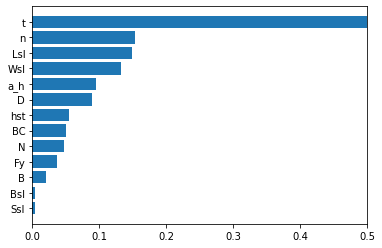

In [20]:
plt.figure()
plt.barh('Features', 'Importance', data=df_sorted)
plt.yticks(range(X.shape[1]))
plt.ylim([-1, X.shape[1]])
plt.xlim([0, 0.5])
plt.show()

t       1.415 +/- 0.034
n       0.156 +/- 0.006
Lsl     0.152 +/- 0.005
Wsl     0.135 +/- 0.004
D       0.092 +/- 0.003
a_h     0.088 +/- 0.010
hst     0.057 +/- 0.002
BC      0.051 +/- 0.002
N       0.050 +/- 0.002
Fy      0.037 +/- 0.002
B       0.021 +/- 0.001
Bsl     0.005 +/- 0.000
Ssl     0.004 +/- 0.000


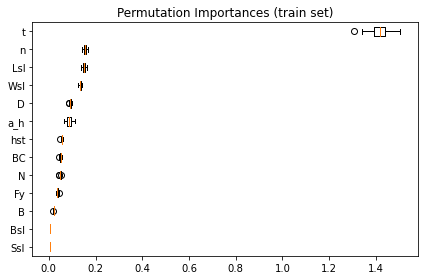

In [21]:
#Permutation importance - Scikit-Learn - Train Set
from sklearn.inspection import permutation_importance
features=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst']
r_train = permutation_importance(reg, X, Y, n_repeats=100, scoring='r2', random_state=0)
for i in r_train.importances_mean.argsort()[::-1]:
        #if r_train.importances_mean[i] - 2 * r_train.importances_std[i] > 0:
            print(f"{features[i]:<8}"
                  f"{r_train.importances_mean[i]:.3f}"
                  f" +/- {r_train.importances_std[i]:.3f}")
           
sorted_idx_train = r_train.importances_mean.argsort()
features_ar=np.array(features)

fig, ax = plt.subplots()
ax.boxplot(r_train.importances[sorted_idx_train].T,
           vert=False, labels=features_ar[sorted_idx_train])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()        

t       1.217 +/- 0.055
n       0.147 +/- 0.012
Lsl     0.139 +/- 0.010
Wsl     0.124 +/- 0.009
a_h     0.114 +/- 0.024
D       0.086 +/- 0.005
hst     0.050 +/- 0.006
BC      0.047 +/- 0.005
N       0.040 +/- 0.003
Fy      0.036 +/- 0.004
B       0.019 +/- 0.002
Ssl     0.004 +/- 0.000
Bsl     0.003 +/- 0.000


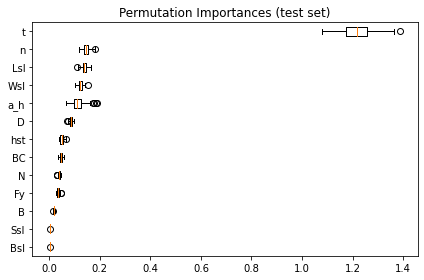

In [22]:
#Permutation importance - Scikit-Learn - Test Set
#from sklearn.inspection import permutation_importance
r_test = permutation_importance(reg, X_T, Y_T, n_repeats=100, scoring='r2', random_state=0)
for i in r_test.importances_mean.argsort()[::-1]:
        #if r_test.importances_mean[i] - 2 * r_test.importances_std[i] > 0:
            print(f"{features[i]:<8}"
                  f"{r_test.importances_mean[i]:.3f}"
                  f" +/- {r_test.importances_std[i]:.3f}")
           
sorted_idx_test = r_test.importances_mean.argsort()
features_ar=np.array(features)

fig, ax = plt.subplots()
ax.boxplot(r_test.importances[sorted_idx_test].T,
           vert=False, labels=features_ar[sorted_idx_test])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()        

t       1.369 +/- 0.030
n       0.153 +/- 0.006
Lsl     0.149 +/- 0.004
Wsl     0.132 +/- 0.004
a_h     0.095 +/- 0.009
D       0.090 +/- 0.002
hst     0.054 +/- 0.003
BC      0.050 +/- 0.002
N       0.048 +/- 0.002
Fy      0.037 +/- 0.002
B       0.021 +/- 0.001
Bsl     0.004 +/- 0.000
Ssl     0.004 +/- 0.000


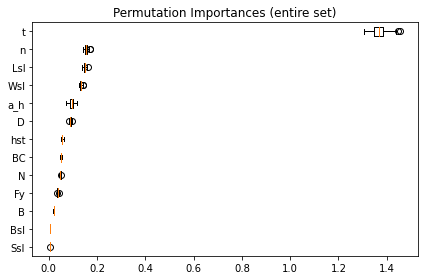

In [23]:
#Permutation importance - Scikit-Learn - Entire Set - default scoring='r2'?
#from sklearn.inspection import permutation_importance
r_all = permutation_importance(reg, X_ALL, Y_ALL, n_repeats=100, scoring='r2', random_state=0)
for i in r_all.importances_mean.argsort()[::-1]:
        #if r_all.importances_mean[i] - 2 * r_all.importances_std[i] > 0:
            print(f"{features[i]:<8}"
                  f"{r_all.importances_mean[i]:.3f}"
                  f" +/- {r_all.importances_std[i]:.3f}")
           
sorted_idx_all = r_all.importances_mean.argsort()
features_ar=np.array(features)

dump(r_all.importances[sorted_idx_all], open('SlCh_Vn_AdaBoost_2021-02-07_Permutation.pkl', 'wb'))
dump(features_ar[sorted_idx_all], open('SlCh_Vn_AdaBoost_2021-02-07_Features.pkl', 'wb'))

fig, ax = plt.subplots()
ax.boxplot(r_all.importances[sorted_idx_all].T,
           vert=False, labels=features_ar[sorted_idx_all])
ax.set_title("Permutation Importances (entire set)")
fig.tight_layout()
plt.show()        

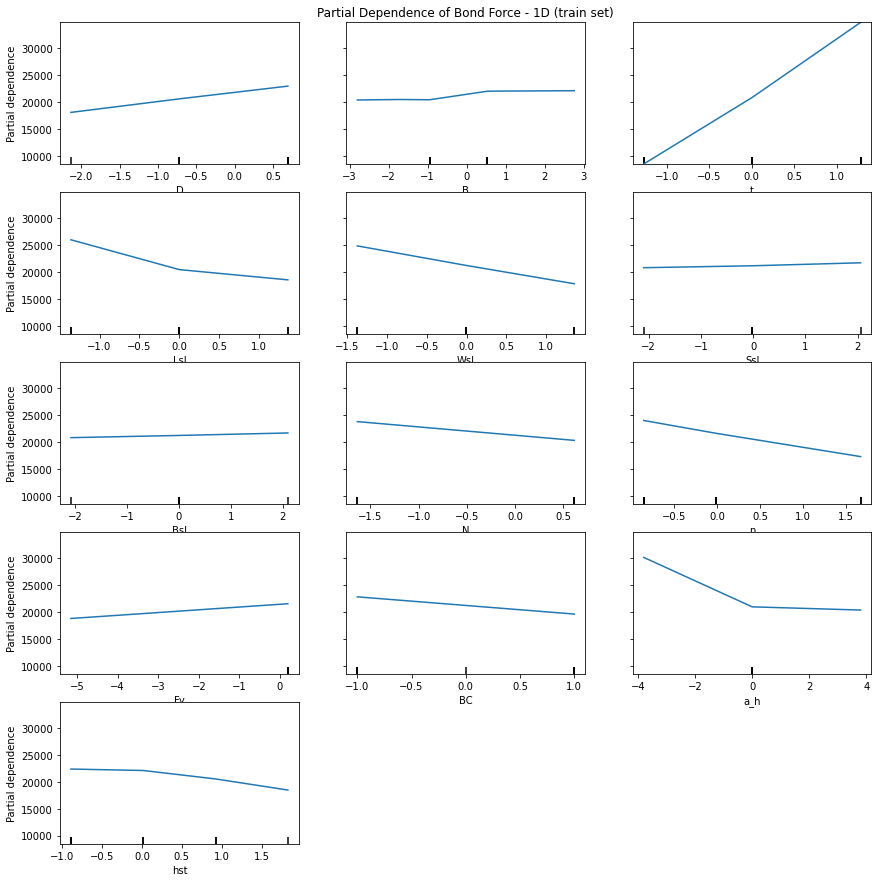

In [24]:
#Partial Dependence Plot - Train Set
from sklearn.inspection import plot_partial_dependence
#import time

#Partial Dependence Plot - Train Set
from sklearn.inspection import plot_partial_dependence
#import time
fig, ax = plt.subplots(figsize=(12, 12))
fig.tight_layout()
ax.set_title("Partial Dependence of Bond Force - 1D (train set)")
pdp_train=plot_partial_dependence(reg, X, features, feature_names=features, percentiles = [0,1], n_cols=3, n_jobs=2,ax=ax)



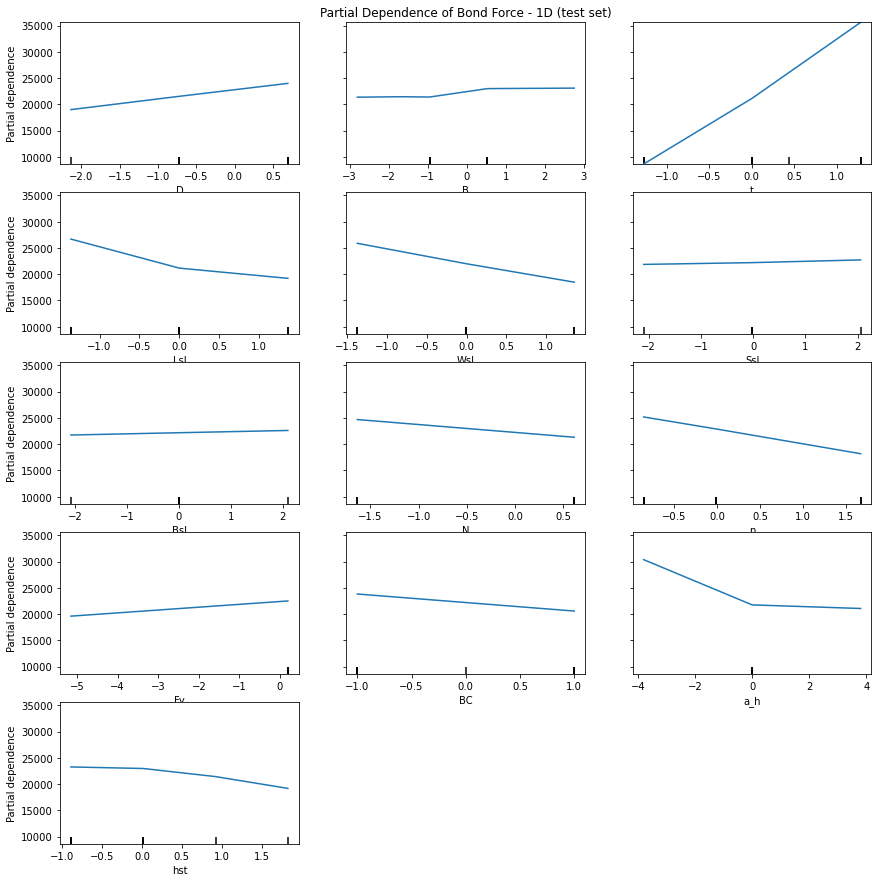

In [25]:
#Partial Dependence Plot - Test Set
from sklearn.inspection import plot_partial_dependence
#import time

#Partial Dependence Plot - Train Set
from sklearn.inspection import plot_partial_dependence
#import time
fig, ax = plt.subplots(figsize=(12, 12))
fig.tight_layout()
ax.set_title("Partial Dependence of Bond Force - 1D (test set)")
pdp_train=plot_partial_dependence(reg, X_T, features, feature_names=features, percentiles = [0,1], n_cols=3, n_jobs=2,ax=ax)



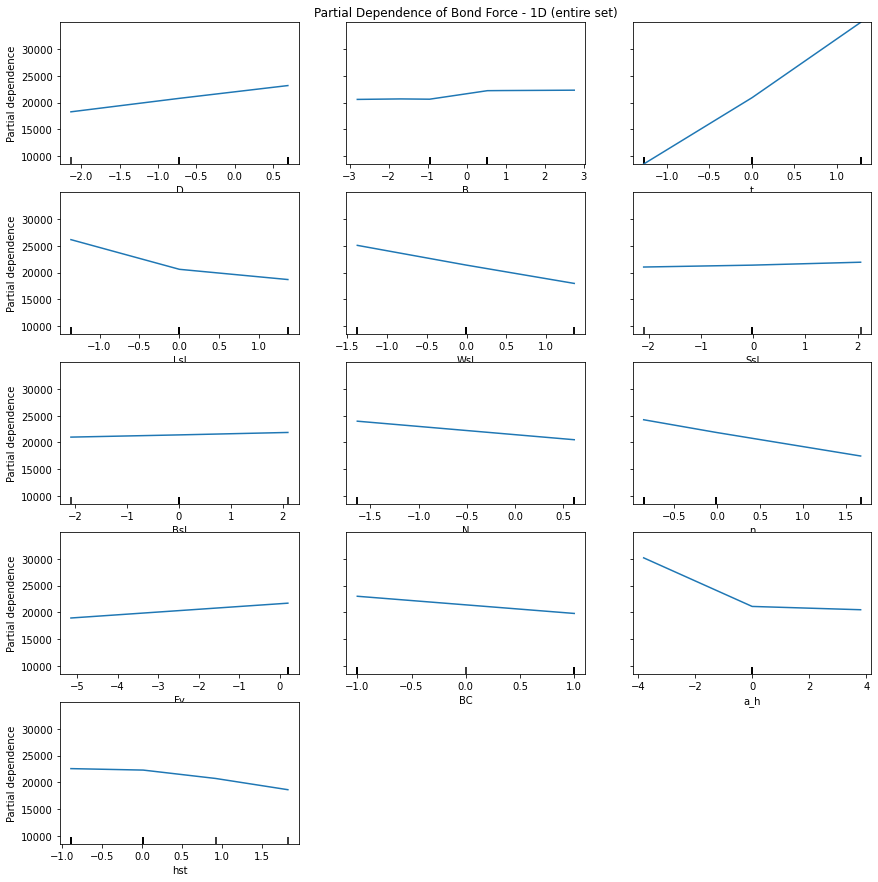

In [26]:
#Partial Dependence Plot - Entire Set
from sklearn.inspection import plot_partial_dependence
#import time

#Partial Dependence Plot - Train Set
from sklearn.inspection import plot_partial_dependence
#import time
fig, ax = plt.subplots(figsize=(12, 12))
fig.tight_layout()
ax.set_title("Partial Dependence of Bond Force - 1D (entire set)")
pdp_train=plot_partial_dependence(reg, X_ALL, features, feature_names=features, percentiles = [0,1], n_cols=3, n_jobs=2,ax=ax)


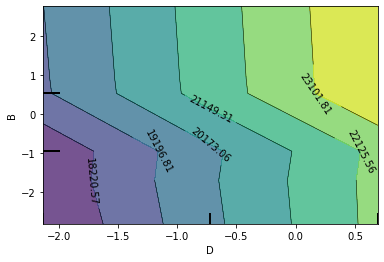

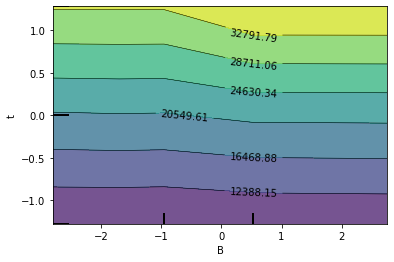

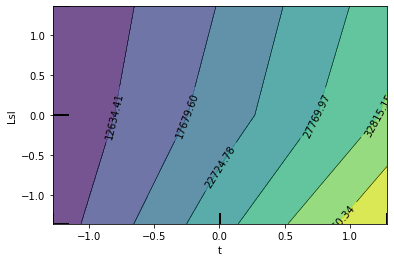

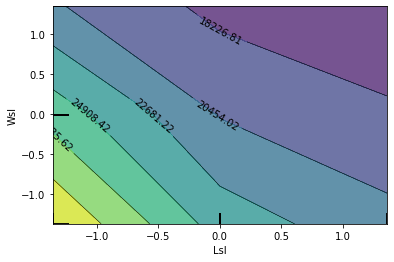

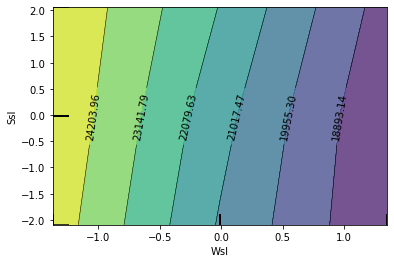

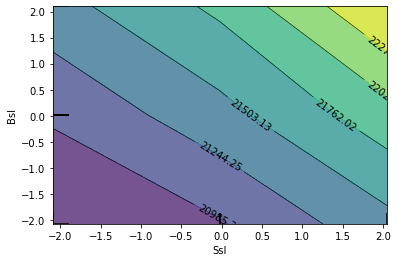

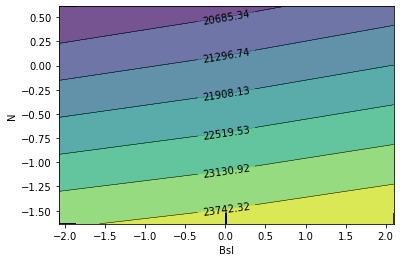

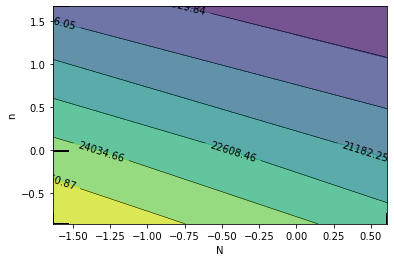

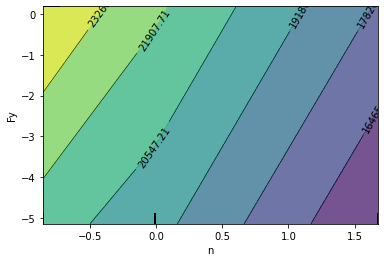

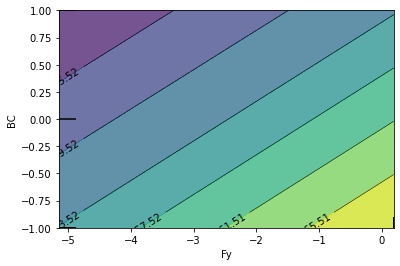

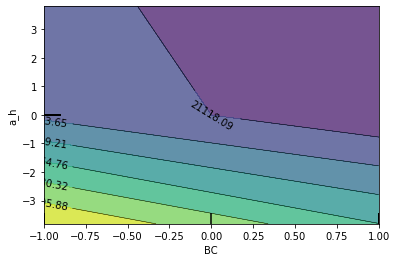

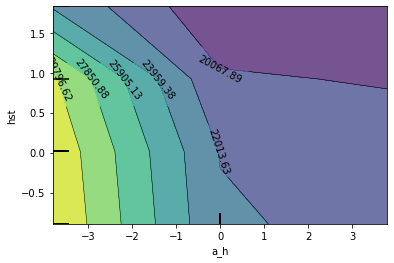

In [27]:
for i in range(12):
    plot_partial_dependence(reg,X_ALL,features=[(i,i+1)], feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'], percentiles = [0,1], n_jobs=3, grid_resolution=20)

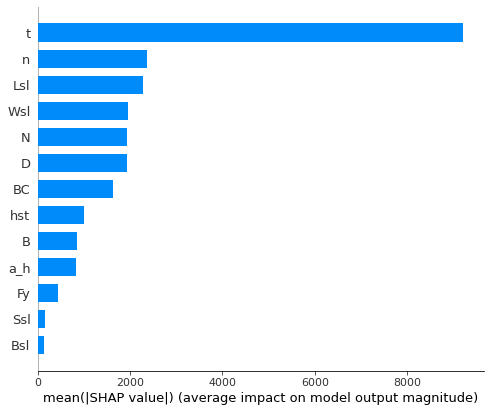

In [28]:
#SHAP
#!pip install shap
import shap

background = X_ALL[:100]
explainer = shap.KernelExplainer(reg.predict, background)
shap_values = explainer.shap_values(X_ALL,check_additivity=False)

dump(shap_values, open('SlCh_Vn_AdaBoost_2021-02-07_SHAP.pkl', 'wb'))

shap.summary_plot(shap_values, X_ALL, plot_type="bar", feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'],show=False)


#plt.savefig('ACI408_Rev_Rr_Ab_reg_OpCV_SHAP.png',dpi=600)

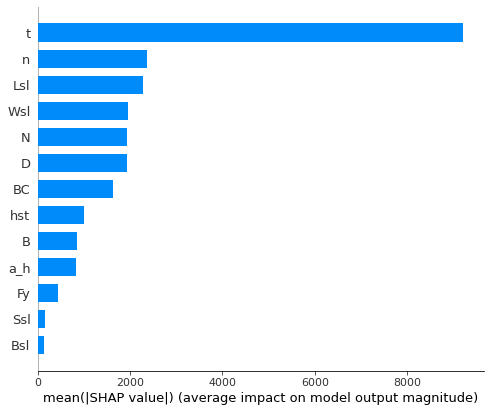

In [29]:
shap.initjs()
shap.summary_plot(shap_values, X_ALL, plot_type="bar", feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'],show=False)

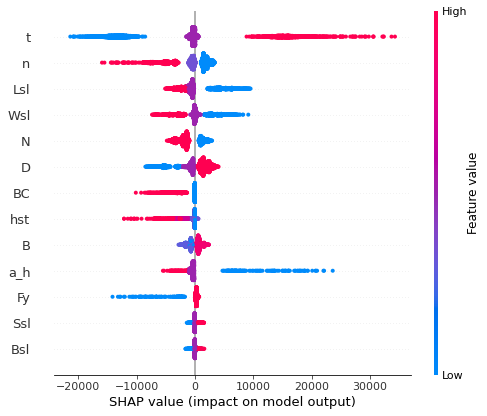

In [30]:
shap.initjs()
shap.summary_plot(shap_values, X_ALL, feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'])

In [31]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_ALL, feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'])

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [32]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_T[0,:],feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'])


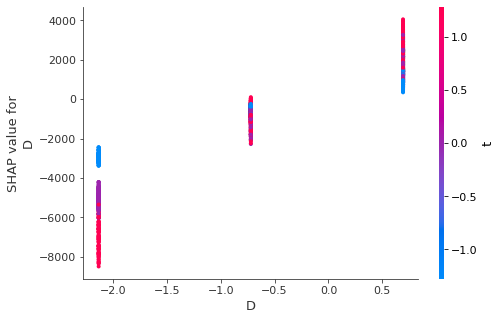

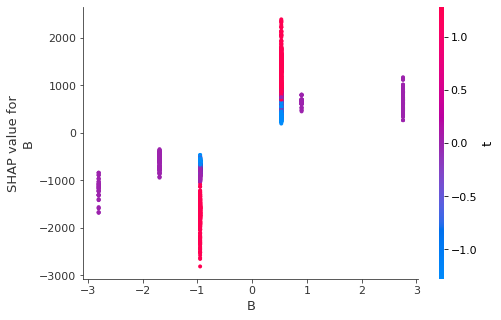

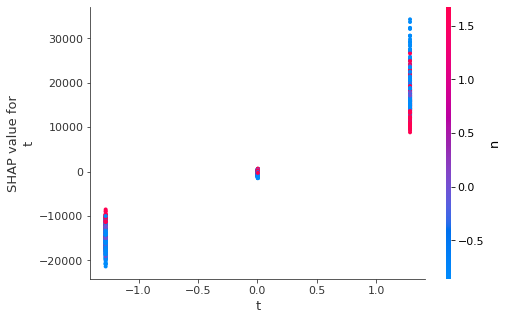

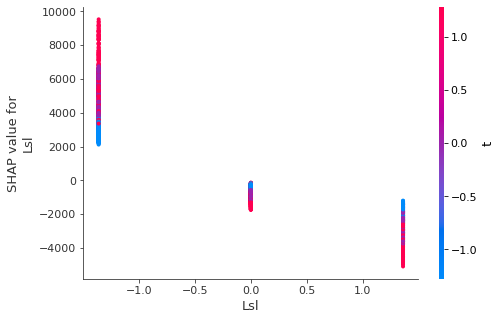

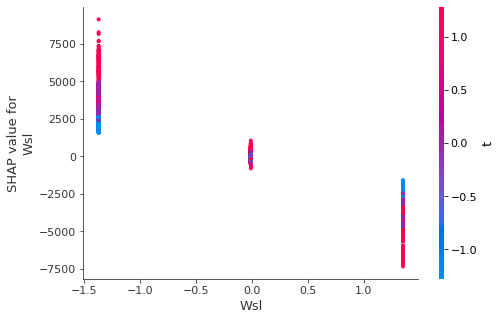

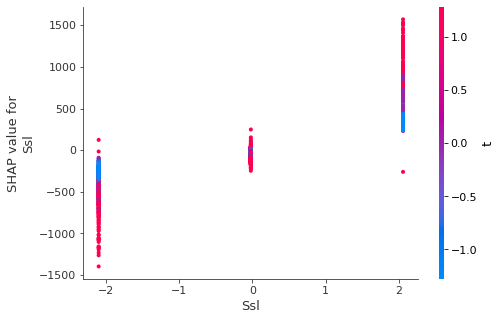

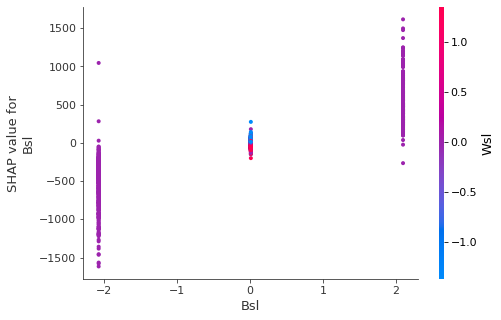

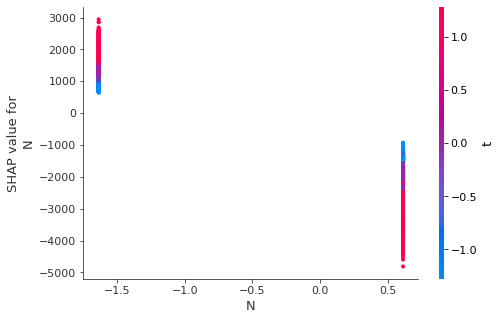

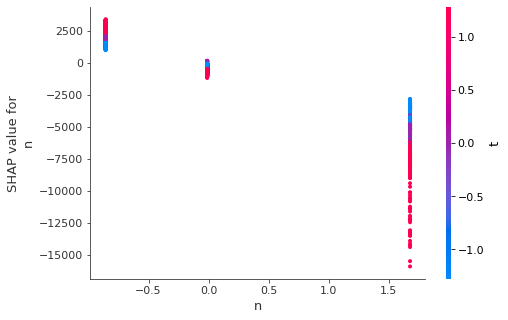

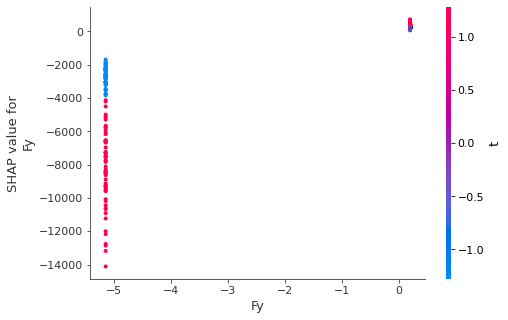

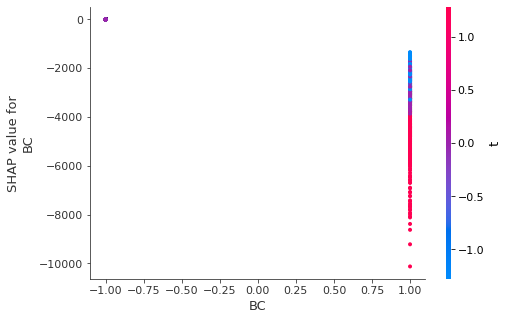

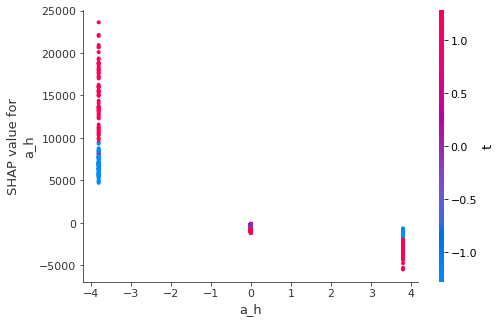

In [33]:
for i in range(12):
    shap.dependence_plot(features[i], shap_values, X_ALL, feature_names=['D','B','t','Lsl','Wsl','Ssl','Bsl','N','n','Fy','BC','a_h','hst'])
